In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from datetime import datetime
from torch.utils.data import TensorDataset, DataLoader

torch.set_default_dtype(torch.float64)

plt.style.use('default')
plt.rcParams['font.size'] = '14'

Task 1

In [51]:
# Load data
data = torch.from_numpy(
           np.genfromtxt (
               'weather.csv',
               delimiter = ",",
               skip_header=1,
               dtype = float ) )

print(f"\nNumber of samples: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}\n")


Number of samples: 52696
Number of variables: 22



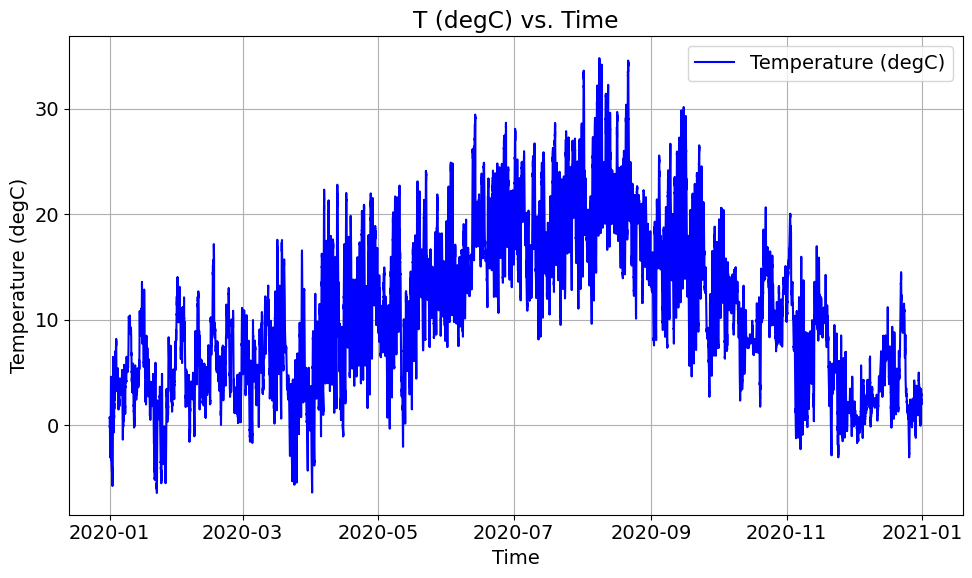

In [66]:
# Plot T(degC) vs. Time
date_strs = np.genfromtxt(
    'weather.csv',
    delimiter=",",
    skip_header=1,
    usecols=0,
    dtype=str
)

# Convert date strings to datetime objects
timesteps = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in date_strs]

# Extract the temperature column
temperatures = data[:, 2].numpy()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(timesteps, temperatures, label='Temperature (degC)', color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('T (degC) vs. Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Convert dates and times to numbers
times = torch.tensor(
    [datetime.strptime(date, '%Y-%m-%d %H:%M:%S').timestamp() for date in date_strs],
    dtype=torch.float
).unsqueeze(1)
data[:, 0] = times[:, 0]

# Split into testing and training datasets
x = data[:, [i for i in range(data.shape[1]) if i != 2]]
y = data[:, 2]

train_len = int(0.7*len(data))

train_indices = list(range(train_len))
test_indices = list(range(train_len, len(data)))

train_dataset = TensorDataset(x[train_indices], y[train_indices])
test_dataset = TensorDataset(x[test_indices], y[test_indices])

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

Task 2

In [54]:
class DLinear(nn.Module):
    def __init__(self, A_s, A_r):
        super(DLinear, self).__init__()
        self.A_s = nn.Parameter(A_s)
        self.A_r = nn.Parameter(A_r)

    def forward(self, x):
        return self.linear(x)

In [68]:
model = DLinear()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
compute_loss = nn.MSELoss()

In [74]:
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        trend = 0.1 * inputs.sum(dim=0)
        seasonal = inputs - trend
        outputs = model(trend*10, seasonal.sum(dim=0)).squeeze()
        loss = compute_loss(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #if (epoch + 1) % 10 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

tensor([ 1.5779e+09,  1.0085e+03,  2.7287e+02, -1.5510e+00,  8.6820e+01,
         6.2780e+00,  5.4490e+00,  8.2800e-01,  3.3670e+00,  5.4050e+00,
         1.2818e+03,  7.7400e-01,  1.3800e+00,  1.9345e+02,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.1831e+01,
         4.3036e+02])
tensor([ 1.5779e+09,  1.0083e+03,  2.7232e+02, -1.8510e+00,  8.8540e+01,
         6.0200e+00,  5.3300e+00,  6.9100e-01,  3.2940e+00,  5.2860e+00,
         1.2842e+03,  6.0500e-01,  1.2800e+00,  1.6530e+02,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.1921e+01,
         4.3358e+02])
tensor([ 1.5779e+09,  1.0079e+03,  2.7125e+02, -2.5050e+00,  9.1450e+01,
         5.5530e+00,  5.0780e+00,  4.7700e-01,  3.1410e+00,  5.0390e+00,
         1.2891e+03,  1.0650e+00,  1.8320e+00,  1.8794e+02,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0992e+01,
         4.3246e+02])
tensor([ 1.5779e+09,  1.0079e+03,  2.7006e+02, -3.3180e+00